# Credit Card Fraud Detection

Building a machine learning model to identify fraudulent credit card transactions.

• Preprocess and normalize the transaction data, handle class imbalance issues,
and split the dataset into training and testing sets.

• Training a classification algorithm, such as logistic regression or random forests, to
classify transactions as fraudulent or genuine.

• Evaluating the model's performance using metrics like precision, recall, and F1-
score, and consider techniques like oversampling or undersampling for
improving results.

To build a machine learning model for identifying fraudulent credit card transactions, we'll go through the following steps:

1. Preprocess and normalize the transaction data

2. Handle class imbalance issues

3. Split the dataset into training and testing sets

4. Train a classification algorithm

5. Evaluate the model's performance

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

1. **Load and Explore the Dataset**

In [11]:
file_path = '/Users/rishikasingh/Downloads/creditcard.csv'
data = pd.read_csv(file_path)

2. **Preprocess the data**

Preprocessing includes handling missing values, encoding categorical features, and normalizing numerical features. For this dataset, we'll normalize the numerical features.

In [12]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data = data.drop(columns=['Time'])

3. **Split the dataset**

We'll split the dataset into training and testing sets using an 80-20 split.

In [13]:
X = data.drop(columns=['Class'])
y = data['Class']
X_resampled, y_resampled = (X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

4. **Train the model**

We'll train a Logistic Regression model and a Random Forest model for comparison.

In [14]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

5. **Predict and evaluate**

In [15]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

6. **Precision, Recall, F1 Score**

We'll evaluate the models using precision, recall, and F1-score.

In [16]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Precision: 0.9625
Recall: 0.7857142857142857
F1 Score: 0.8651685393258427
Confusion Matrix:
 [[56861     3]
 [   21    77]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



 # Visualisation (Graphs)

1. **Class Distribution**

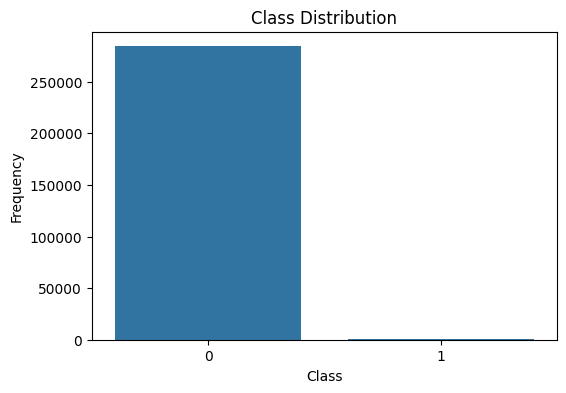

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

2. **Transaction Amount Distribution**

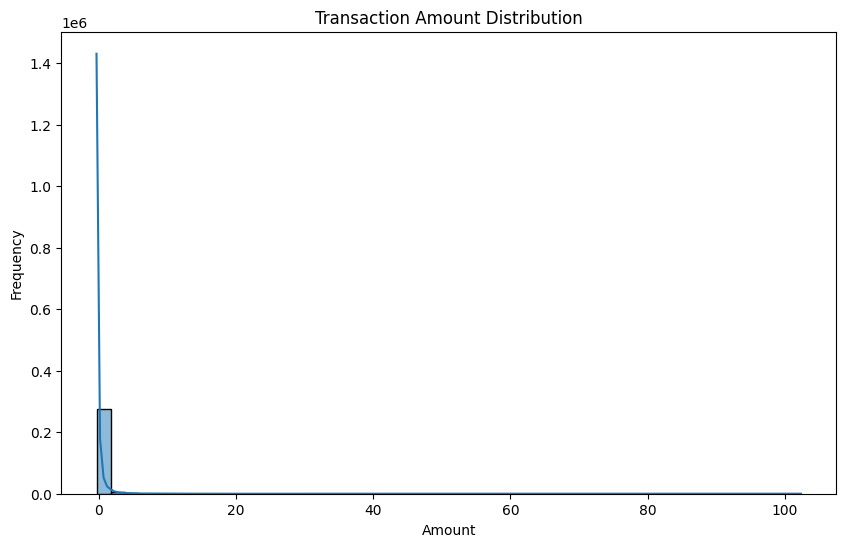

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


3. **Feature Importances (for Random Forest)**

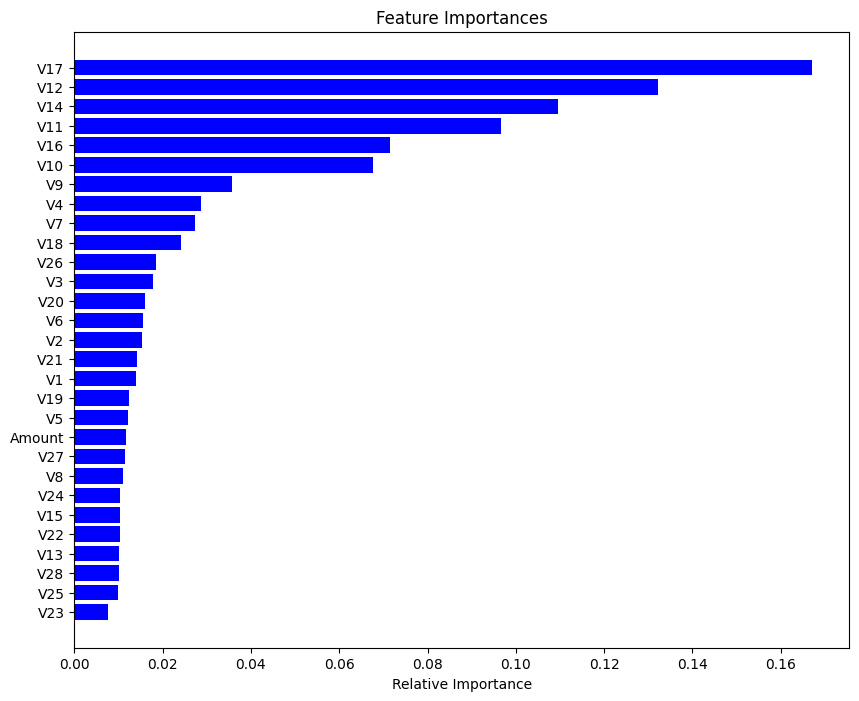

In [19]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()